In [2]:
## Importing Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


## 1. Loading the data

In [174]:
df = pd.read_csv('./all_stocks_5yr.csv')

In [7]:
df.head(10)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [8]:
df.shape

(619040, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


## 2. Exploratory Data Analysis

In [11]:
### Checking for null values

df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [14]:
df[df.isna().any(axis=1)]

,date,open,high,low,close,volume,Name
82949,2017-07-26,NaN,NaN,NaN,69.0842,3,BHF
165734,2015-07-17,NaN,88.76,88.24,88.7200,2056819,DHR
165857,2016-01-12,NaN,NaN,NaN,88.5500,0,DHR
205076,2015-07-17,NaN,48.49,47.85,47.9200,1246786,ES
239832,2016-07-01,NaN,NaN,NaN,49.5400,0,FTV
434379,2015-07-17,NaN,47.31,46.83,46.9900,1229513,O
434502,2016-01-12,NaN,NaN,NaN,52.4300,0,O
478594,2015-06-09,NaN,NaN,NaN,526.0900,12135,REGN
558213,2016-04-07,NaN,NaN,NaN,41.5600,0,UA
581906,2015-05-12,NaN,NaN,NaN,124.0800,569747,VRTX


### Removing null values
Since only a small amount of data contains null value we will remove these rows

In [175]:
df.dropna(ignore_index=True, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619029 entries, 0 to 619028
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619029 non-null  object 
 1   open    619029 non-null  float64
 2   high    619029 non-null  float64
 3   low     619029 non-null  float64
 4   close   619029 non-null  float64
 5   volume  619029 non-null  int64  
 6   Name    619029 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [17]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [20]:
df['Name'].nunique()

505

In [21]:
df['Name'].value_counts().max()

1259

In [22]:
df['Name'].value_counts().min()

44

In [30]:
sf = df['Name'].value_counts()
sf[sf == 1259]

Name
AAL     1259
NOV     1259
NLSN    1259
NKE     1259
NI      1259
        ... 
EQT     1259
DIS     1259
DLR     1259
DLTR    1259
DTE     1259
Name: count, Length: 468, dtype: int64

In [54]:
filter_df = df.groupby(['Name']).sum('volume').sort_values(by = 'volume',ascending=False)
filter_df.head(10)

,open,high,low,close,volume
Name,,,,,
BAC,22292.6398,22493.8851,22081.8351,22289.5600,117884953591
AAPL,137300.7850,138428.4580,136150.2604,137314.9734,68046305767
GE,33400.2499,33632.1975,33156.5777,33396.6640,53023644686
F,17767.8498,17914.2024,17593.3269,17755.2200,43388129992
FB,121436.9197,122609.9049,120187.9662,121466.5704,43258314899
MSFT,64242.2304,64757.9329,63743.6695,64288.4185,42641653597
AMD,7055.8329,7198.0141,6907.6707,7052.7450,40941468586
MU,28939.2230,29378.2445,28460.0824,28922.4941,38082749687
INTC,40041.9061,40395.6653,39707.5002,40075.8972,36922332801


**Top 10 Companies with highest volumes**

BAC - Bank of America\
AAPL - Apple\
GE - General Electric\
F - Ford\
FB - Facebook\
MSFT - Microsoft\
AMD - Advanced Micro Devices\
INTC - Intel Corp\
CSCO - Cisco 

In [55]:
filter_df.tail(10)

,open,high,low,close,volume
Name,,,,,
SNA,175326.945,176675.7131,173925.7070,175366.1000,530283843
ESS,261471.045,263681.1862,259187.0043,261511.3400,477004832
RE,230230.725,231959.8122,228492.2963,230274.7800,434037215
DXC,18465.805,18629.4135,18319.5162,18475.4700,424529395
HII,168337.265,169919.3432,166769.2972,168454.4500,418791148
WLTW,70686.220,71243.6739,70070.8975,70719.3700,414734590
AZO,780165.305,786794.8499,773371.4067,780206.9000,397585127
MTD,448330.940,452312.3815,444527.0450,448578.5500,214489754
BHF,8531.905,8633.1542,8428.1341,8530.8868,144878389


**Top 10 Companies with lowest volumes**

APTV - Aptiv PLC \
BHF - Brighthouse Financial \
MTD - Mettler-Toledo International \
AZO - Autozone\
WLTW - Willis Towers Watson Public Limited Company\
HII - Huntington Ingalls Industries\
DXC - DXC Technology\
RE  - RE Royalties\
ESS - Essex Property Trust \
SNA - Snap-On

### Selecting Data

In [91]:
company = list(filter_df.head(10).index)
company

['BAC', 'AAPL', 'GE', 'F', 'FB', 'MSFT', 'AMD', 'MU', 'INTC', 'CSCO']

In [182]:
data = df[df["Name"].isin(company)].reset_index(drop=True)

In [183]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


### Converting Date

For further analysis of data we need date to be in the appropriate format. Using the pandas function we can convert the object type date to datetime format

In [203]:
data.to_csv("10 company.csv")

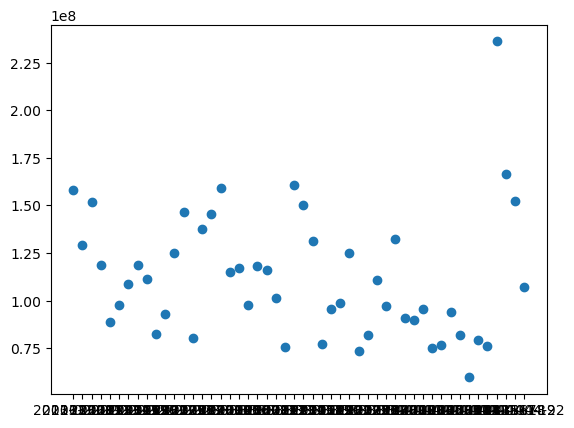

In [62]:
plt.scatter(x=data['date'][:50],y=data['volume'][:50])

In [190]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12590 entries, 0 to 12589
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               12590 non-null  datetime64[ns]
 1   open               12590 non-null  float64       
 2   high               12590 non-null  float64       
 3   low                12590 non-null  float64       
 4   close              12590 non-null  float64       
 5   volume             12590 non-null  int64         
 6   Name               12590 non-null  object        
 7   price_chang        12589 non-null  float64       
 8   price_change_pct   12589 non-null  float64       
 9   volume_change      12589 non-null  float64       
 10  volume_change_pct  12589 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 1.1+ MB


In [184]:
data_cp = data.copy()

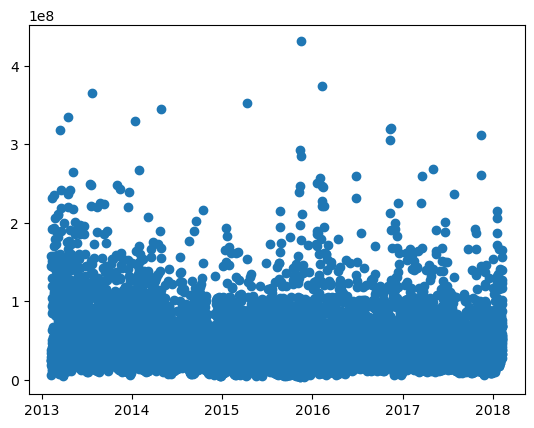

In [65]:
plt.scatter(x=data['date'],y=data['volume'])

In [69]:
data.describe()

,date,open,high,low,close,volume
count,12590,12590.000000,12590.000000,12590.000000,12590.000000,1.259000e+04
mean,2015-08-09 05:44:16.393963520,40.300525,40.666639,39.923701,40.309134,4.132370e+07
min,2013-02-08 00:00:00,1.620000,1.690000,1.610000,1.620000,2.606577e+06
25%,2014-05-09 00:00:00,15.900000,16.040000,15.732500,15.870000,2.211401e+07
50%,2015-08-10 00:00:00,27.220000,27.450000,26.985000,27.232500,3.105966e+07
75%,2016-11-07 00:00:00,45.545000,46.085000,45.092500,45.595000,4.849717e+07
max,2018-02-07 00:00:00,192.040000,195.320000,189.980000,193.090000,4.313326e+08
std,NaN,37.920988,38.211248,37.615958,37.932401,3.253543e+07


### Stock price and Volume Analysis

**Closing Price**\
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

**Volume of Sales**\
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.


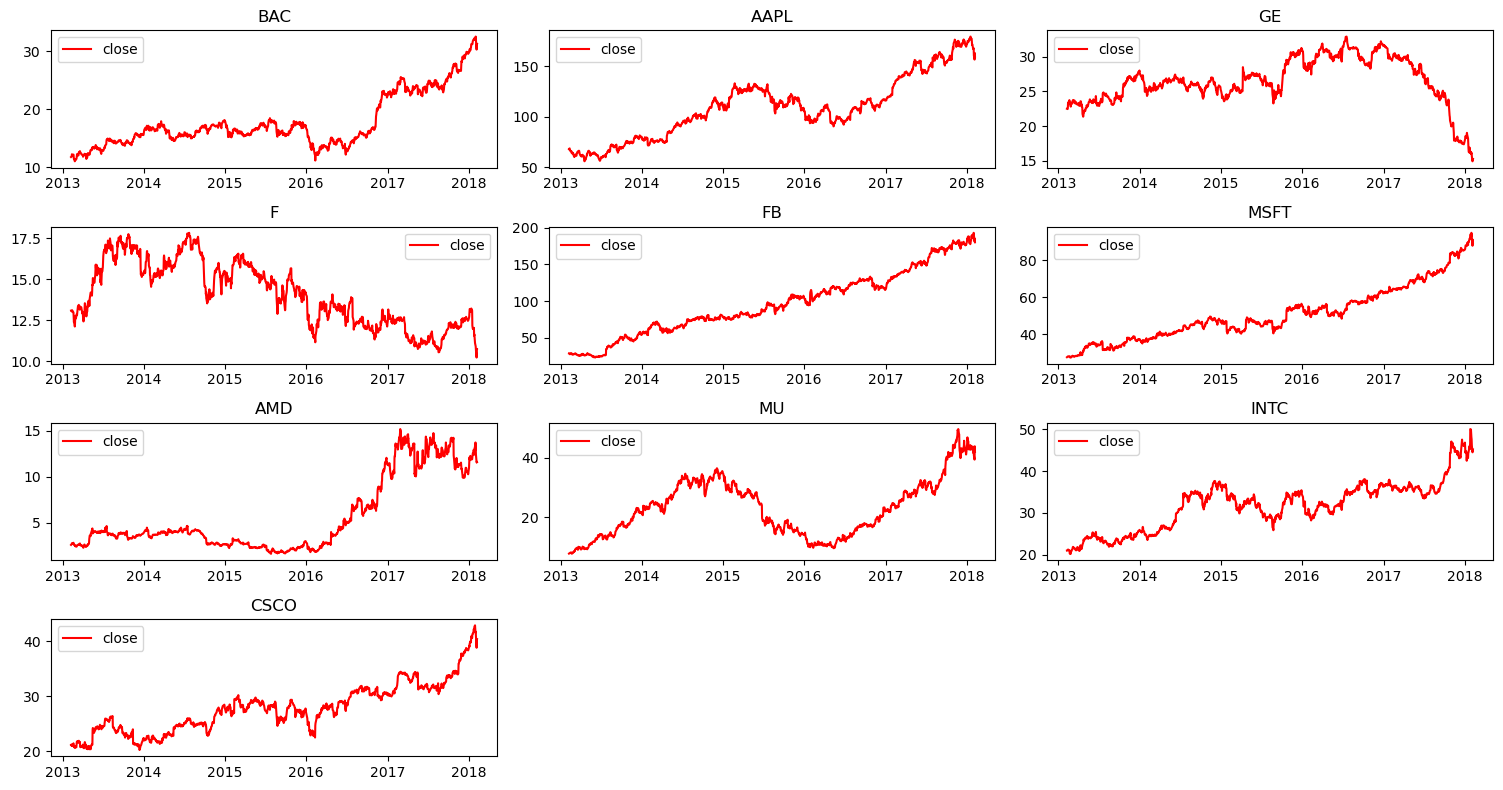

In [120]:
### Plotting closing price of each company over the years
plt.figure(figsize=(15, 8)) 
for index, comp in enumerate(company, 1): 
    plt.subplot(4, 3, index) 
    c = data[data['Name'] == comp] 
    plt.plot(c['date'], c['close'], c="r", label="close") 
    plt.title(comp) 
    plt.legend() 
    plt.tight_layout()

For the above plot, we can see that mostly the stock prices have gone up in the span of 5 years. There are only 2 companies whose stock went down that is `General Electric` and `Ford`. \
Additionally, Facebook has witnessed highest growth and apple the second highest. On the other hand AMD witnessed the lowest growth. 

Let's take a quick look at the numbers of Apple, facebook, and AMD 

In [123]:
data[data['Name'] == 'AAPL'].describe()

,date,open,high,low,close,volume
count,1259,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,2015-08-09 05:44:16.393963264,109.055429,109.951118,108.141589,109.066698,5.404790e+07
min,2013-02-08 00:00:00,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,2014-05-10 12:00:00,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,2015-08-10 00:00:00,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,2016-11-05 12:00:00,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,2018-02-07 00:00:00,179.370000,180.100000,178.250000,179.260000,2.668336e+08
std,NaN,30.549220,30.686186,30.376224,30.556812,3.346835e+07


In [124]:
data[data['Name'] == 'FB'].describe()

,date,open,high,low,close,volume
count,1259,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,2015-08-09 05:44:16.393963264,96.455059,97.386739,95.463039,96.478610,3.435927e+07
min,2013-02-08 00:00:00,22.990000,23.090000,22.670000,22.899000,5.913066e+06
25%,2014-05-10 12:00:00,64.720000,65.617800,63.880000,64.861750,1.780491e+07
50%,2015-08-10 00:00:00,90.590000,92.060000,89.650000,90.950000,2.608916e+07
75%,2016-11-05 12:00:00,125.785000,126.680000,124.950000,126.145000,4.252176e+07
max,2018-02-07 00:00:00,192.040000,195.320000,189.980000,193.090000,3.653806e+08
std,NaN,43.765800,43.972039,43.542059,43.799446,2.672781e+07


In [126]:
data[data['Name'] == 'AMD'].describe()

,date,open,high,low,close,volume
count,1259,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,2015-08-09 05:44:16.393963264,5.604315,5.717247,5.486633,5.601863,3.251904e+07
min,2013-02-08 00:00:00,1.620000,1.690000,1.610000,1.620000,2.606577e+06
25%,2014-05-10 12:00:00,2.670000,2.720000,2.630000,2.670000,1.240657e+07
50%,2015-08-10 00:00:00,3.850000,3.930000,3.790000,3.850000,2.222858e+07
75%,2016-11-05 12:00:00,7.490000,7.640000,7.270000,7.495000,4.174201e+07
max,2018-02-07 00:00:00,15.450000,15.650000,14.520000,15.200000,2.683365e+08
std,NaN,3.979483,4.054507,3.889996,3.971779,3.079792e+07


### Monthly charts

Since we are dealing with 5 years of stock data, it is ideal to take a look at montly charts. Doing so will help us in the following ways:

1. Smoother trends and more general insights, reducing noise from daily fluctuations.
2. Useful for long-term investment decisions or performance reviews.
3. Suitable for strategic planning and less frequent trading

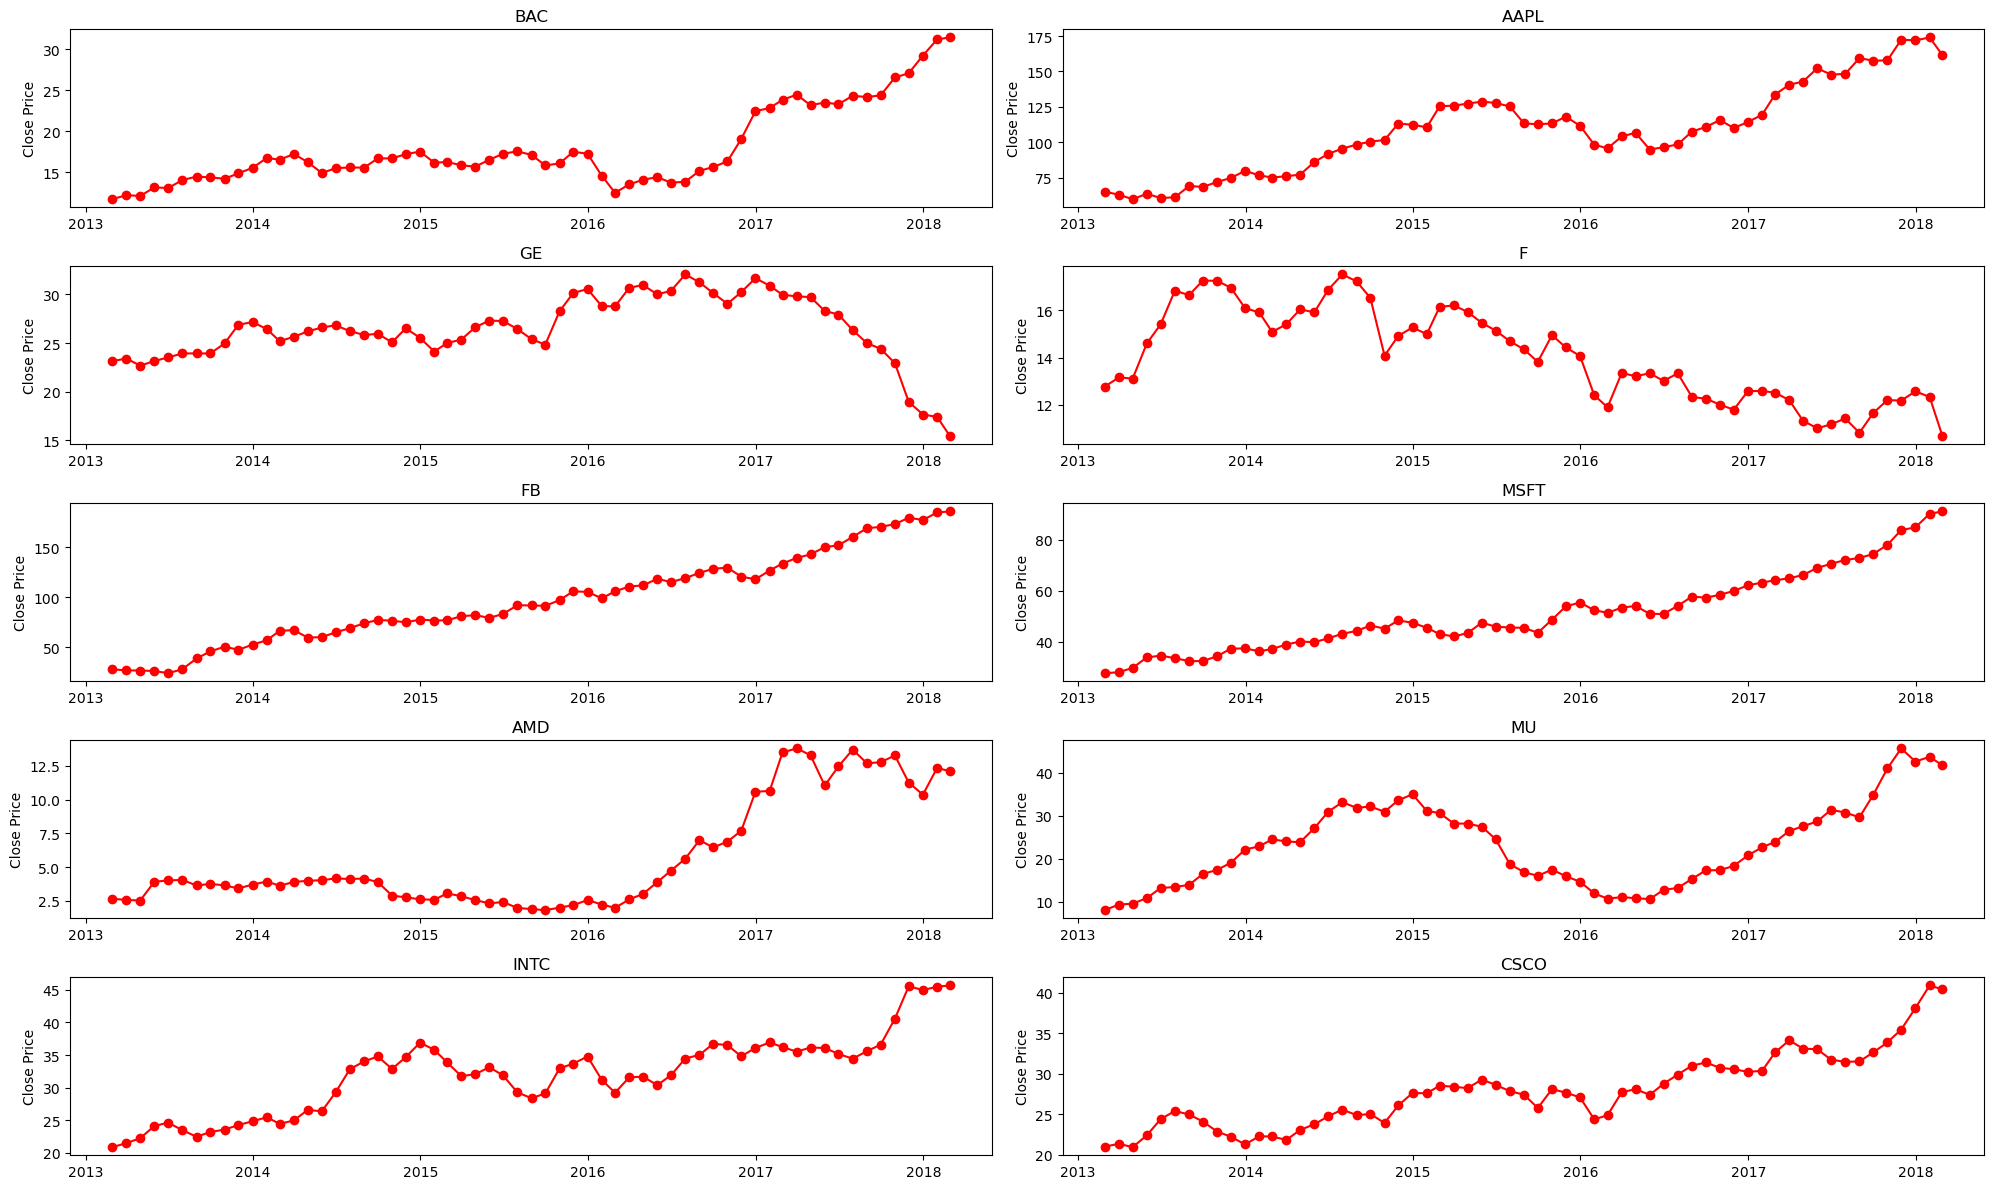

In [251]:
# Plotting the closing price for each month
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 12))  # Adjust for 10 plots
axes = axes.flatten()

for i, comp in enumerate(company):
    ax1 = axes[i]
    d = data[data['Name'] == comp]  # Filter data by company
    d = d.set_index('date') if 'date' in d.columns else d
    monthly_data = d['close'].resample('ME').mean() # Resample the data to get weekly averages
    ax1.plot(monthly_data.index, monthly_data.values, color='red', label='Close Price', marker='o', linestyle='-')
    ax1.set_title(comp)
    ax1.set_ylabel('Close Price')

    
fig.tight_layout()
plt.show()

We can notice certain trends more clearly with the monthly plot.

1. Some companies like Facebook and Microsoft have consistent (linear growth over the years)
2. Companies like AMD, BAC and MU have experienced sharp growth after 2016.
3. Ford and Intel Corp shows high volatility over the period.

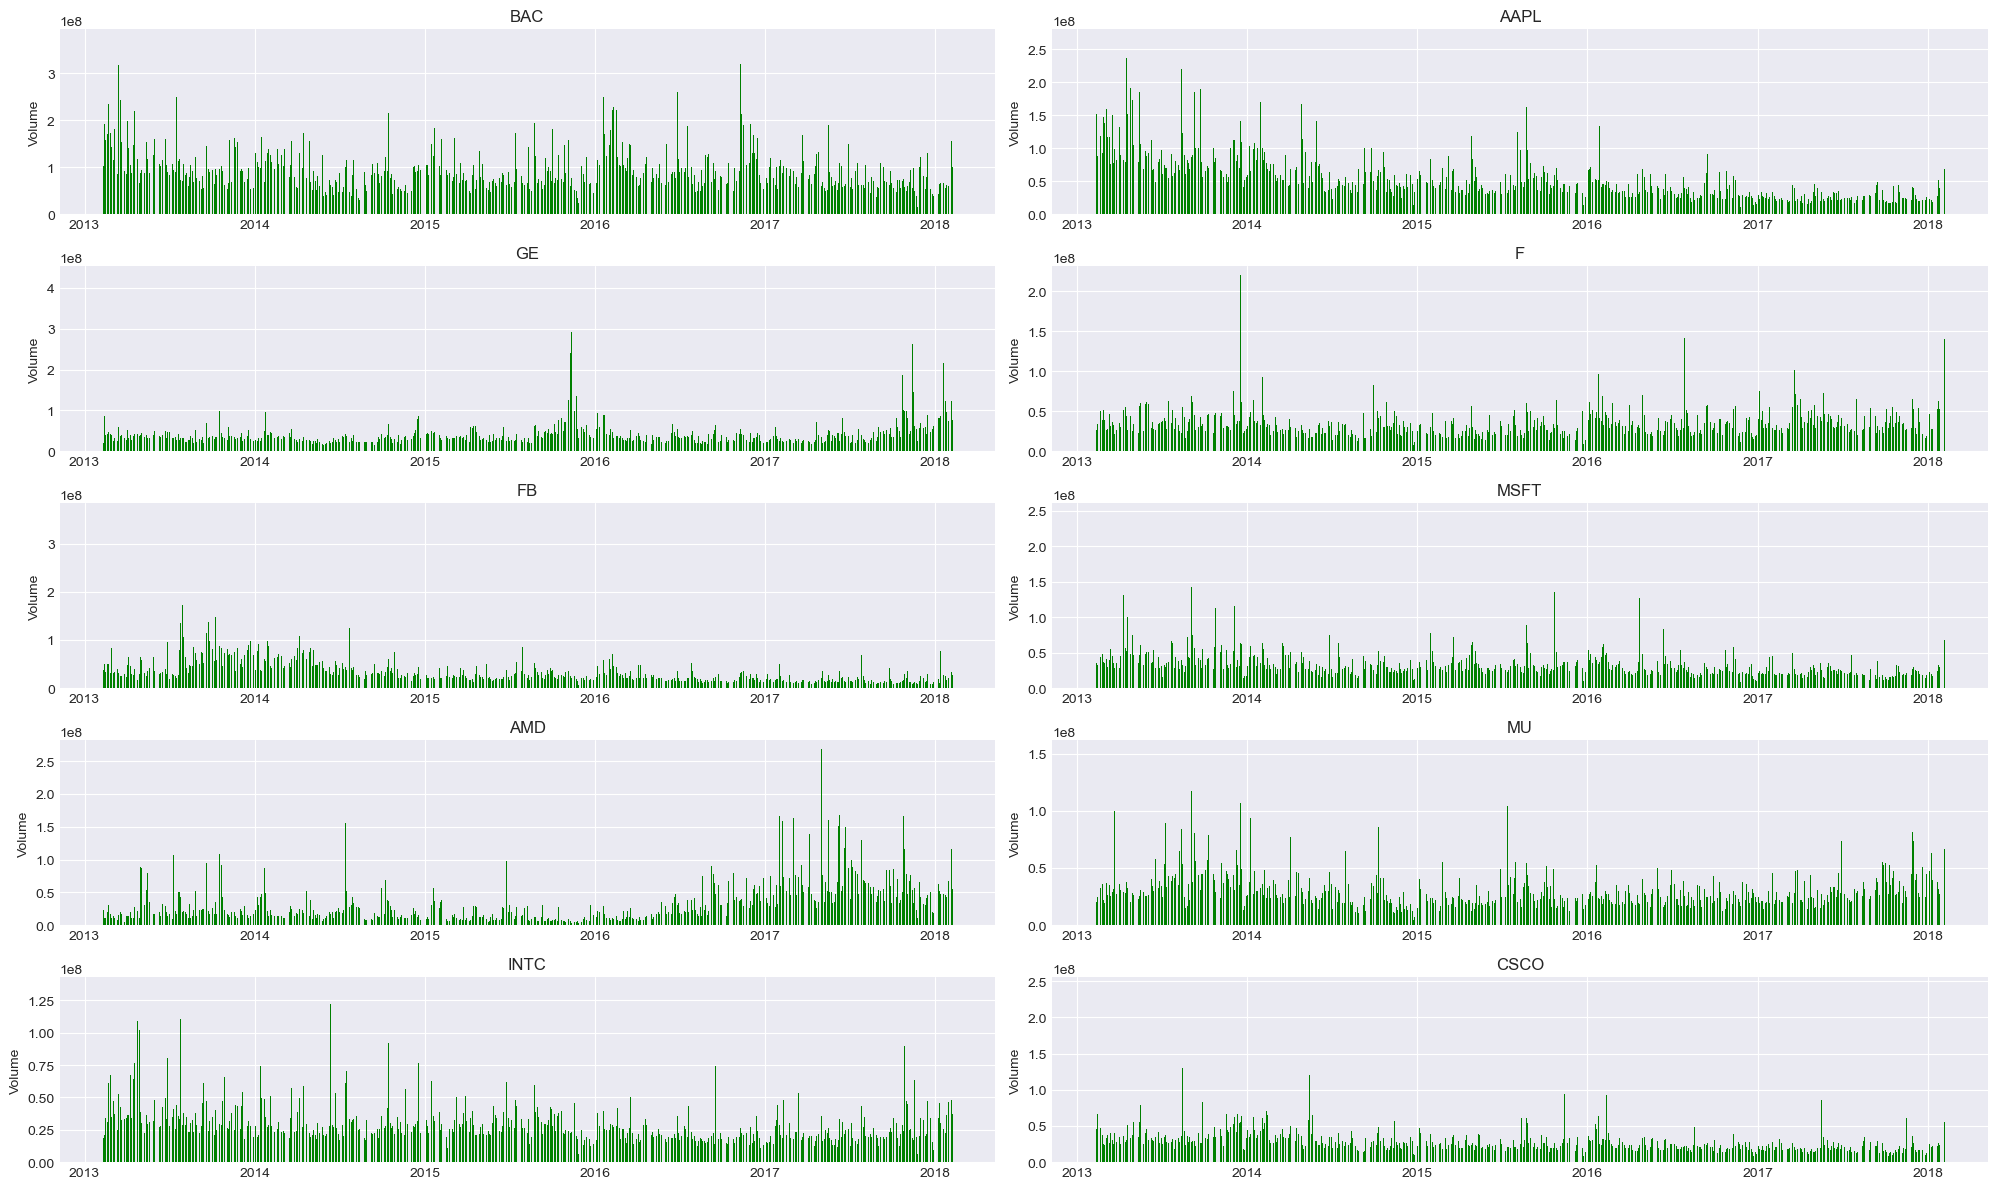

In [266]:
### Plotting sales volume of each company.
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 12))  # Adjust for 10 plots
axes = axes.flatten()

for i, comp in enumerate(company):
    ax1 = axes[i]
    d = data[data['Name'] == comp]  # Filter data by company
    
    ax1.bar(d['date'],d['volume'], color='green', label='Volume')
    ax1.set_title(comp)
    ax1.set_ylabel('Volume')

    
fig.tight_layout()
plt.show()

Following observation can be made from the above plot.

1. FB, MSFT, AAPL, and GE: Noticeable peaks in 2013 and 2016-2017, reflecting external market changes or company-specific events.
2. MU, AMD, and INTC: Show higher trading volume on average, especially in later years, suggesting growing investor interest or volatility.
3. BAC, AMD, and MU appear to have more frequent spikes compared to others, signaling frequent trading activity.
4. FB and GE have fewer but sharper peaks, indicating specific periods of concentrated interest.

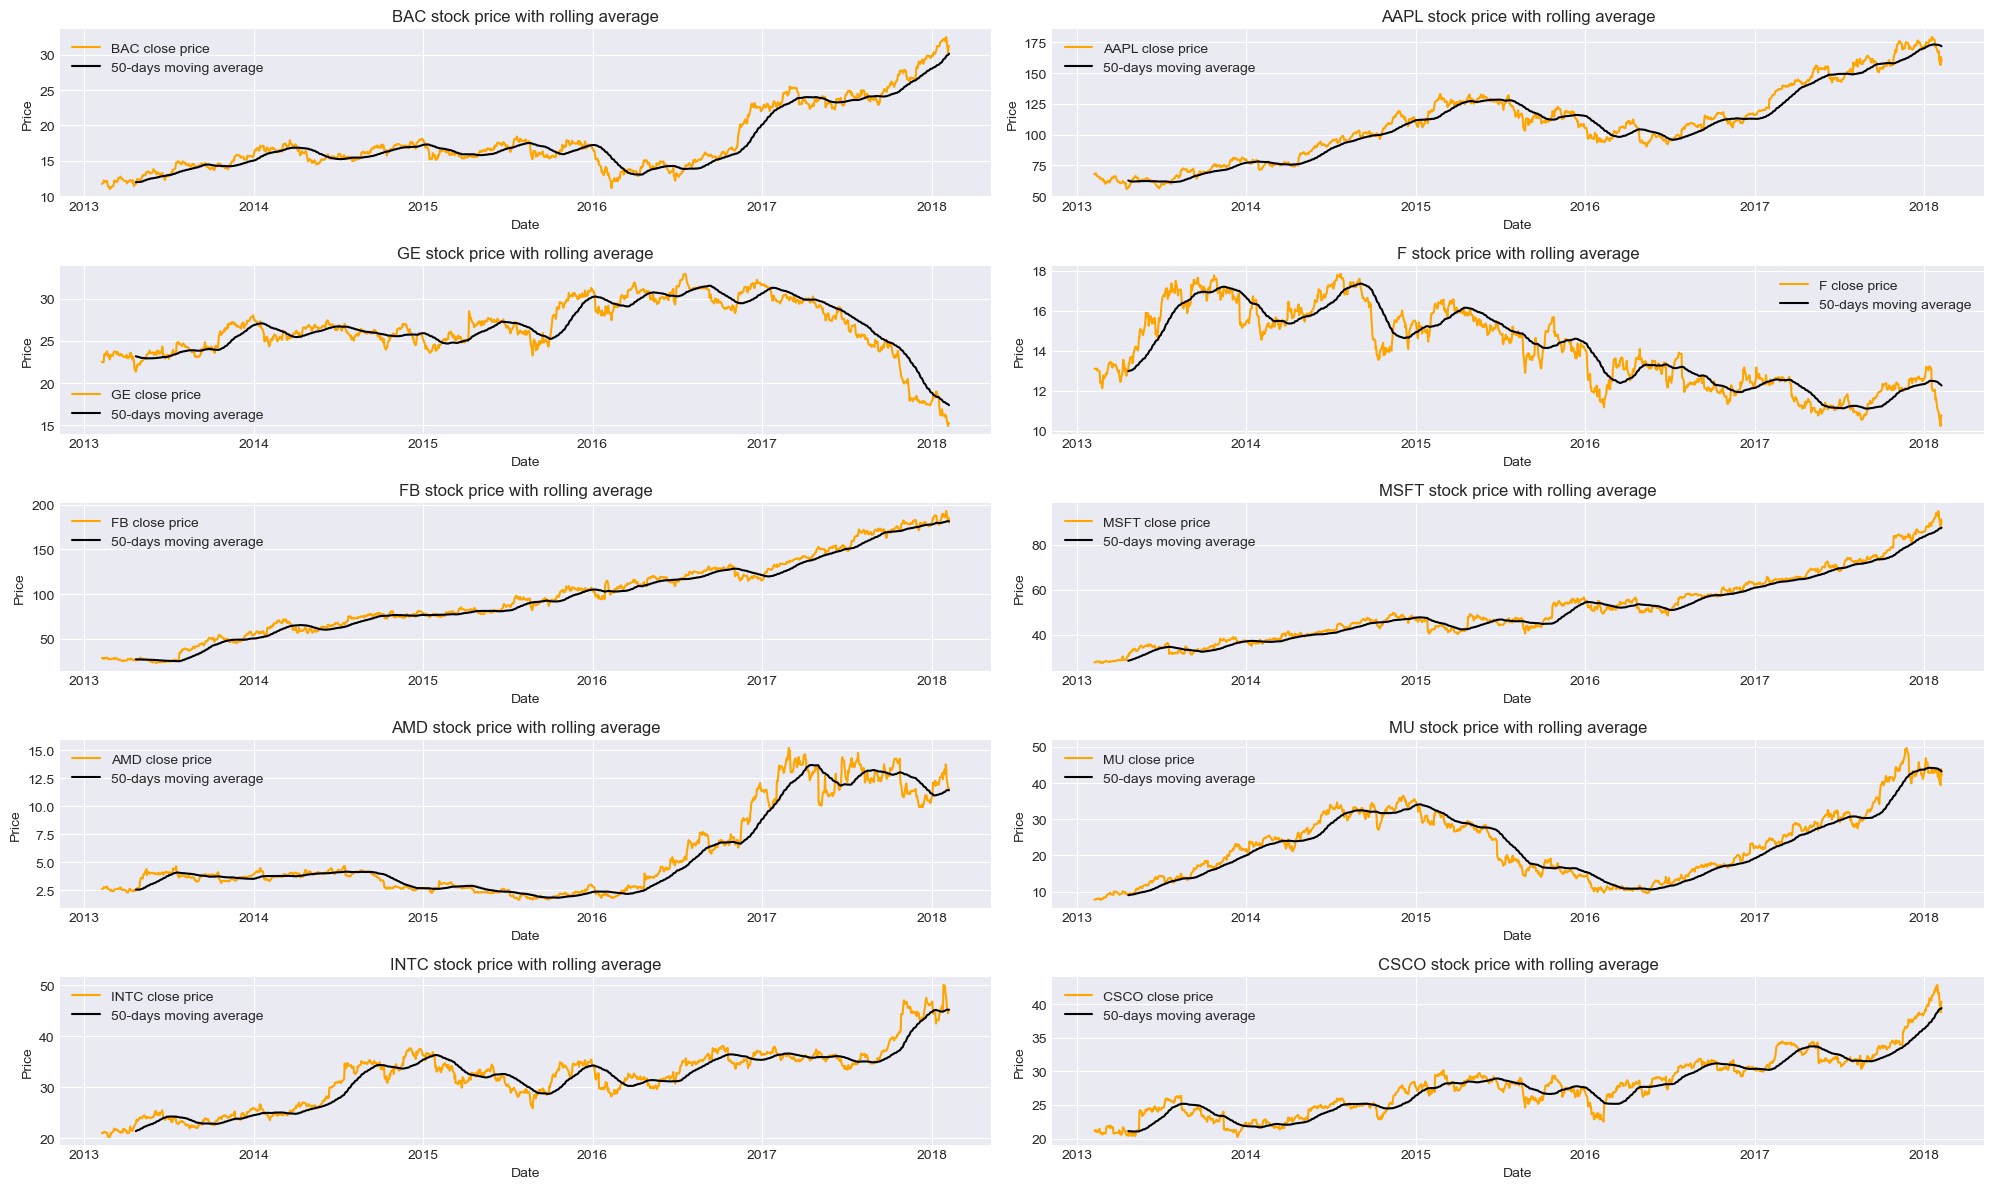

In [274]:
### Plotting sales volume of each company.
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 12))  # Adjust for 10 plots
axes = axes.flatten()

for i, comp in enumerate(company):
    ax1 = axes[i]
    d = data[data['Name'] == comp]  # Filter data by company
    ma_50 = d['close'].rolling(window=50).mean()
    ax1.plot(d['date'], d['close'], color='orange', label= f"{comp} close price")
    ax1.plot(d['date'],ma_50, color='black', label='50-days moving average')
    ax1.set_title(f"{comp} stock price with rolling average")
    ax1.set_ylabel('Price')
    ax1.set_xlabel('Date')
    ax1.legend()

fig.tight_layout()
plt.show()

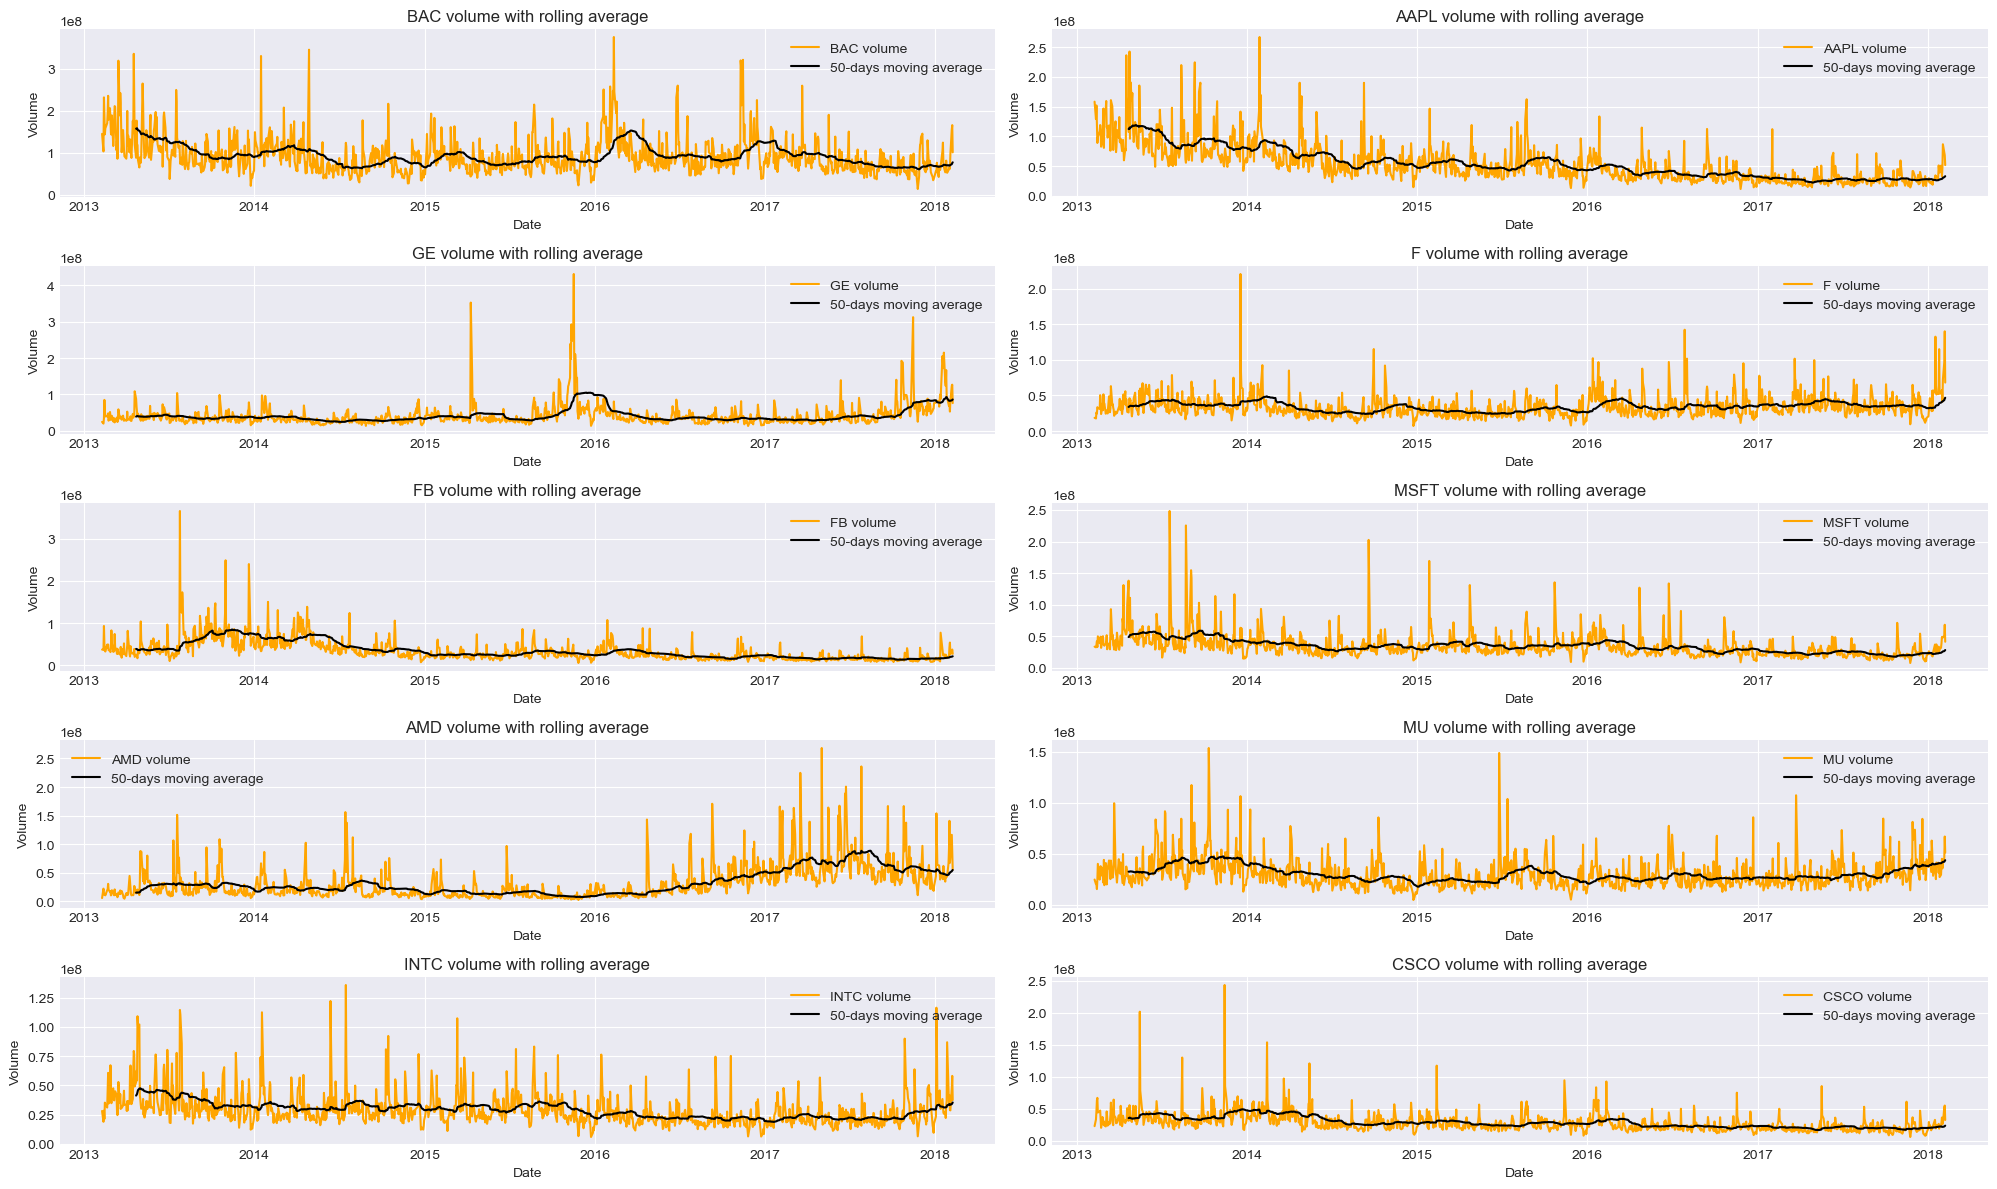

In [273]:
### Plotting sales volume of each company.
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 12))  # Adjust for 10 plots
axes = axes.flatten()

for i, comp in enumerate(company):
    ax1 = axes[i]
    d = data[data['Name'] == comp]  # Filter data by company
    ma_50 = d['volume'].rolling(window=50).mean()
    ax1.plot(d['date'], d['volume'], color='orange', label= f"{comp} volume")
    ax1.plot(d['date'],ma_50, color='black', label='50-days moving average')
    ax1.set_title(f"{comp} volume with rolling average")
    ax1.set_ylabel('Volume')
    ax1.set_xlabel('Date')
    ax1.legend()

fig.tight_layout()
plt.show()

**Next Steps**

Overlay these plots with stock price data to understand how volume spikes impact prices.

### Correlation between Stock price and Volume

High trading volumes often convey valuable information about investors' sentiments regarding a market or security. For instance, a substantial price increase coupled with a significant uptick in volume might signal a sustained bullish trend or a bullish reversal. In contrast, a significant price decrease accompanied by increased volume can indicate a continuing bearish trend or a potential bearish reversal

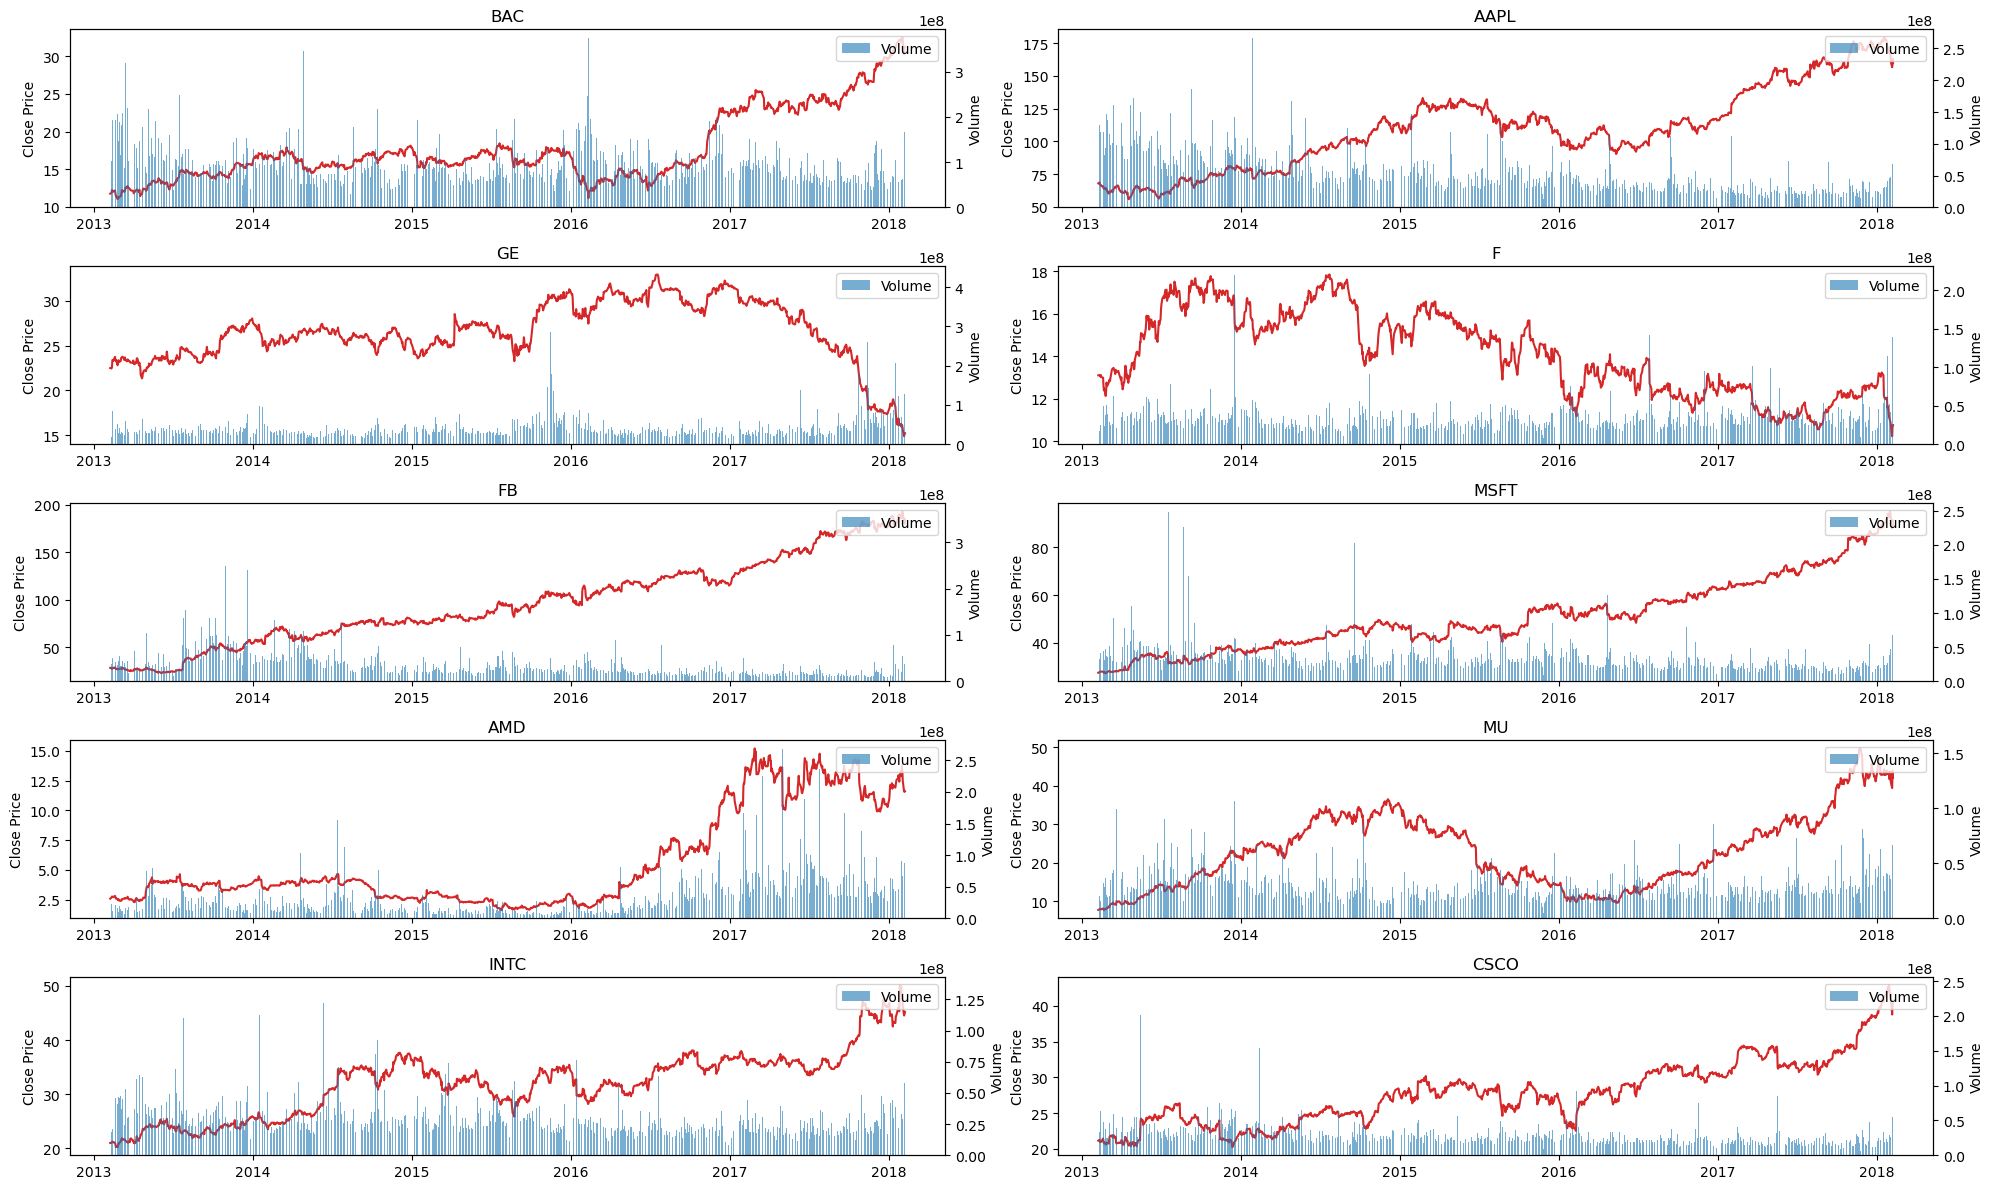

In [253]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 12))  # Adjust for 10 plots
axes = axes.flatten()

for i, comp in enumerate(company):
    ax1 = axes[i]
    d = data[data['Name'] == comp]  # Filter data by company
    
    ax1.plot(d['date'], d['close'], color='tab:red', label='Close Price')
    ax1.set_title(comp)
    ax1.set_ylabel('Close Price')
    
    ax2 = ax1.twinx()
    ax2.bar(d['date'], d['volume'], color='tab:blue', alpha=0.6, label='Volume')
    ax2.set_ylabel('Volume')
    plt.legend()

fig.tight_layout()
plt.show()

From the above charts we can notice that spike in volume is mostly accompanied by sparp decrease in price. 

To further enhance our analysis of the correlation between stock price and volume we need to calculate the absolute change and percent change of price and volume.

In [250]:
### Calculating the absolute and percent change of stock price
data['price_change'] = data['close'].diff()
data['price_change_pct'] = data['close'].pct_change()

In [186]:
### Calculating the absolute and percent change of volume
data['volume_change'] = data['volume'].diff()
data['volume_change_pct'] = data['volume'].pct_change()

In [187]:
data.head()

,date,open,high,low,close,volume,Name,price_chang,price_change_pct,volume_change,volume_change_pct
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.7072,0.010422,-29138991.0,-0.184228
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.7186,-0.025067,22799938.0,0.176703
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.1272,-0.001903,-33107368.0,-0.218056
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.0600,-0.000899,-29912841.0,-0.251957


In [206]:
data.describe()

,date,open,high,low,close,volume,price_chang,price_change_pct,volume_change,volume_change_pct
count,12590,12590.000000,12590.000000,12590.000000,12590.000000,1.259000e+04,12589.000000,12589.000000,1.258900e+04,12589.000000
mean,2015-08-09 05:44:16.393963520,40.300525,40.666639,39.923701,40.309134,4.132370e+07,-0.002053,0.000713,-8.484680e+03,0.074144
min,2013-02-08 00:00:00,1.620000,1.690000,1.610000,1.620000,2.606577e+06,-167.080000,-0.983766,-2.535572e+08,-0.884287
25%,2014-05-09 00:00:00,15.900000,16.040000,15.732500,15.870000,2.211401e+07,-0.190000,-0.007519,-6.843674e+06,-0.201089
50%,2015-08-10 00:00:00,27.220000,27.450000,26.985000,27.232500,3.105966e+07,0.010000,0.000503,-5.592170e+05,-0.020918
75%,2016-11-07 00:00:00,45.545000,46.085000,45.092500,45.595000,4.849717e+07,0.240000,0.009264,6.304481e+06,0.226786
max,2018-02-07 00:00:00,192.040000,195.320000,189.980000,193.090000,4.313326e+08,14.660000,1.091078,2.925520e+08,9.264611
std,NaN,37.920988,38.211248,37.615958,37.932401,3.253543e+07,2.330365,0.027229,2.186868e+07,0.470316


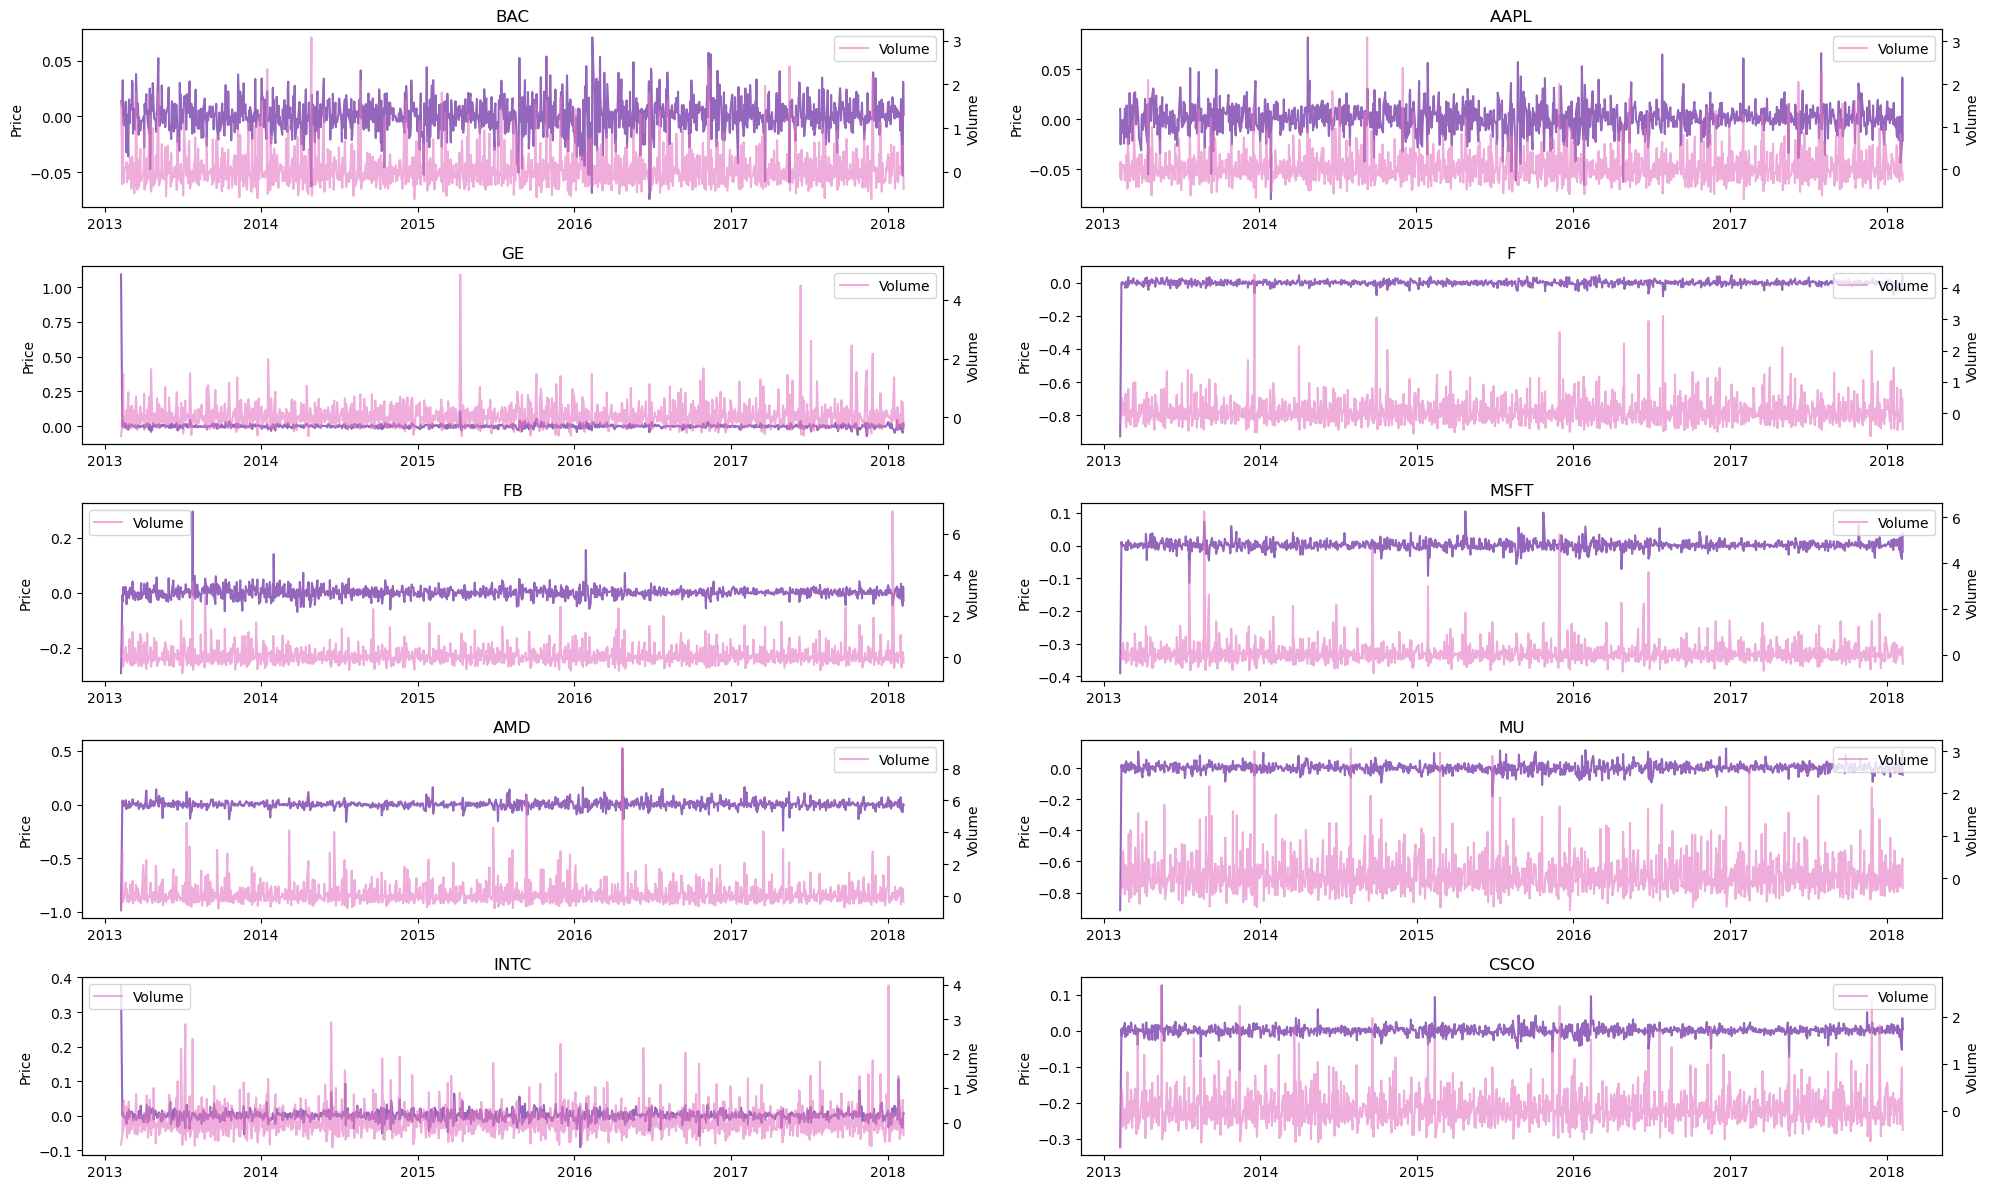

In [204]:
### Plotting pct price change and volume change
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 12))  # Adjust for 10 plots
axes = axes.flatten()

for i, comp in enumerate(company):
    ax1 = axes[i]
    d = data[data['Name'] == comp]  # Filter data by company
    
    ax1.plot(d['date'], d['price_change_pct'], color='tab:purple', label='Close Price')
    ax1.set_title(comp)
    ax1.set_ylabel('Price')
    
    ax2 = ax1.twinx()
    ax2.plot(d['date'], d['volume_change_pct'], color='tab:pink', alpha=0.6, label='Volume')
    ax2.set_ylabel('Volume')
    plt.legend()

fig.tight_layout()
plt.show()

Observation 1: For companies like F and MSFT, price changes appear relatively stable (narrow range of purple line), even during volume spikes.
Conclusion 1: This suggests that certain stocks may have higher liquidity, where large trading volumes do not significantly impact prices.

Observation 2: Companies like GE and AMD display sharp price swings (high variance in purple lines).
Conclusion 2: These stocks may be more volatile and sensitive to trading activity, making them riskier but potentially high-reward investments.

Observation 3: Companies like BAC and CSCO show consistent price changes with fewer outliers.
Conclusion 3: These stocks appear more stable, with less extreme volatility despite volume fluctuations

**Next Step**

Visualising the correlation between volume_change_pct and price_change_pct.

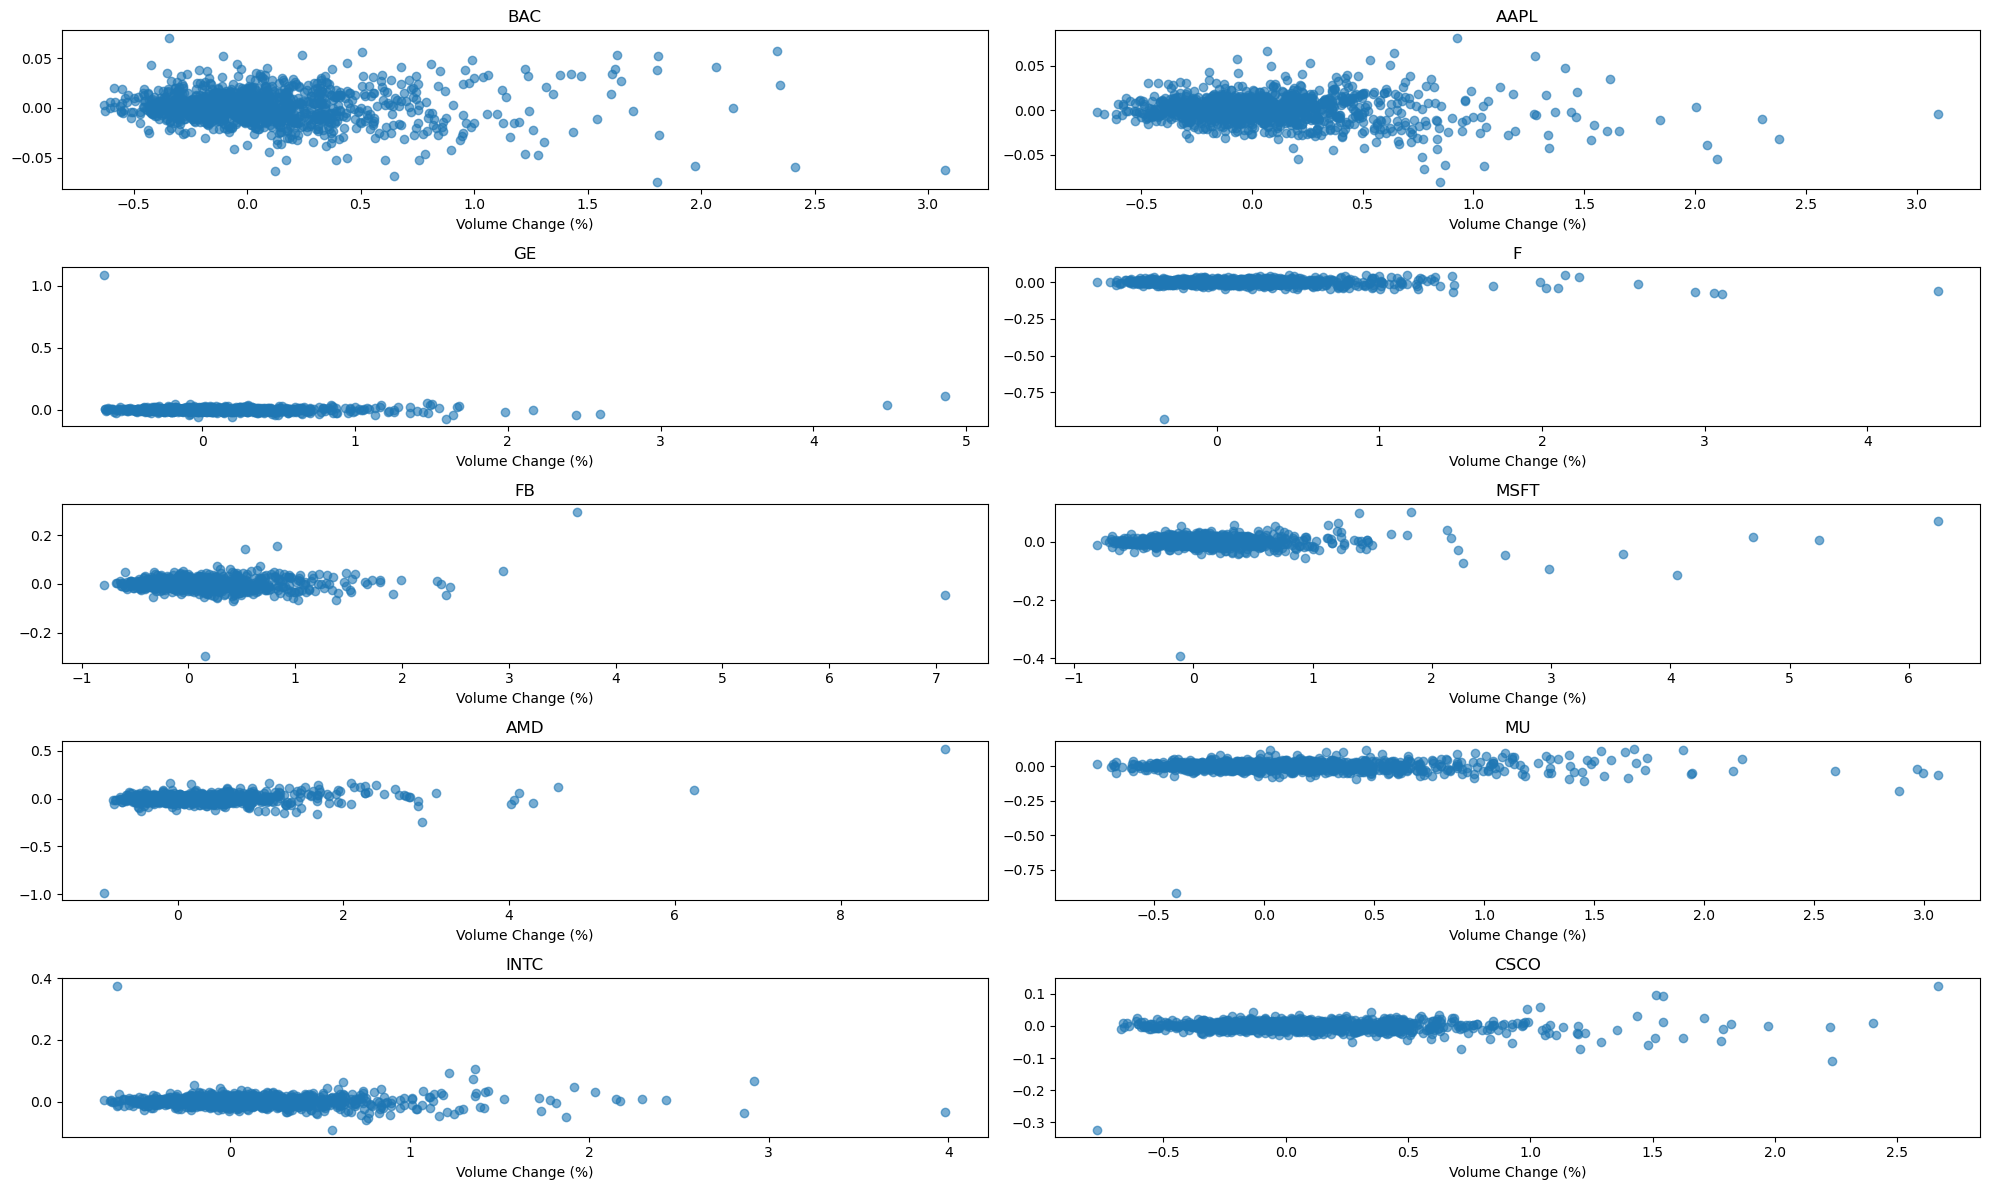

In [205]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 12))  # Adjust for 10 plots
axes = axes.flatten()

for i, comp in enumerate(company):
    ax1 = axes[i]
    d = data[data['Name'] == comp]  # Filter data by company
    
    ax1.scatter(d['volume_change_pct'], d['price_change_pct'], alpha=0.6, color='tab:blue', label='Close Price')
    ax1.set_title(comp)
    ax1.set_xlabel('Volume Change (%)')
    ax2.set_ylabel('Price Change (%)')

fig.tight_layout()
plt.show()

**Observations drawn from the above plot**

1. For most companies, the scatter plots appear widely dispersed around zero, suggesting weak correlation between volume change (%) and price change (%).

2. Some companies, like FB or BAC, show slight clustering with a discernible upward or downward trend, suggesting a mild correlation between volume changes and price movements.

3. There are points far away from the dense cluster which may represent unusual event.

**To get further clarity on the correlation and outliers we will perform the following analysis:**

a. Calculate the correlation coefficients\
b. Filter for extreme volume changes

#### Calculating correlation coefficient

In [193]:
### Calculating the pearsons correlation coefficient for each company
for comp in company:
    d = data[data['Name'] == comp]
    correlation = d['price_change_pct'].corr(d['volume_change_pct'])
    print(f" {comp} : {correlation}")

 BAC : -0.053144526799292525
 AAPL : -0.11011909528633985
 GE : -0.03418876380482608
 F : -0.06808016715461215
 FB : 0.044474414902103146
 MSFT : -0.016644891890951523
 AMD : 0.22601571414042093
 MU : -0.02127607098061307
 INTC : -0.031443717967737386
 CSCO : -0.010366982834805546


Based on the above analysis of stock price and volume these results can be drawn.

1. Positive Correlation:\
    AMD with a correlation of 0.226 suggests that, for this stock, there may be a slight tendency for price to rise as volume increases.

2. Negative Correlation:\
AAPL and GE have the weakest negative correlations (around -0.110 and -0.034 respectively), indicating minimal relationships between price and volume, but with small negative effects.

4. Near Zero Correlations:\
Most other stocks show very weak or negligible correlations (close to 0), suggesting that volume and price changes are largely independent for these stocks.

**Overall Conclusion:**\
There is no strong evidence that volume changes significantly impact stock price movements for most companies in this analysis.
AMD stands out as the only stock with a moderately positive correlation, which could indicate some market behavior where higher volume correlates with price increases, possibly due to investor sentiment or news events.

### Outliers

In [207]:
threshold = 0.5  # Example threshold
filtered_df = data[abs(data['volume_change_pct']) > threshold]

In [215]:
frames = []
for i, comp in enumerate(company):
    d = data[data['Name'] == comp]
    mean_volume = d['volume_change_pct'].mean()
    std_volume = d['volume_change_pct'].std()
    ev = d[(d['volume_change_pct'] > mean_volume + 3*std_volume) | 
                      (d['volume_change_pct'] < mean_volume - 3*std_volume)]
    frames.append(ev)

extreme_volume = pd.concat(frames)

In [216]:
extreme_volume

,date,open,high,low,close,volume,Name,price_chang,price_change_pct,volume_change,volume_change_pct
2518,2013-02-08,11.86,11.9000,11.720,11.76,145217221,BAC,0.16,0.013793,89458857.0,1.604402
2542,2013-03-15,12.52,12.6600,12.350,12.57,318880083,BAC,0.46,0.037985,205155493.0,1.803968
2577,2013-05-06,12.39,12.8900,12.360,12.88,264618705,BAC,0.64,0.052288,170442938.0,1.809839
2744,2014-01-02,15.69,16.1600,15.680,16.10,149225696,BAC,0.53,0.034040,91994732.0,1.607429
2753,2014-01-15,17.23,17.4200,17.110,17.15,330005943,BAC,0.38,0.022660,231488045.0,2.349705
...,...,...,...,...,...,...,...,...,...,...,...
4664,2016-08-17,30.97,30.9701,30.330,30.72,55071218,CSCO,-0.40,-0.012853,31671532.0,1.353502
4729,2016-11-17,29.91,30.0500,29.610,30.05,75252307,CSCO,-1.52,-0.048147,48155167.0,1.777131
4928,2017-09-05,32.15,32.2450,31.455,31.62,32650934,CSCO,-0.68,-0.021053,17964356.0,1.223182
4986,2017-11-27,36.51,37.0900,36.500,36.87,20942222,CSCO,0.38,0.010414,14786428.0,2.402034


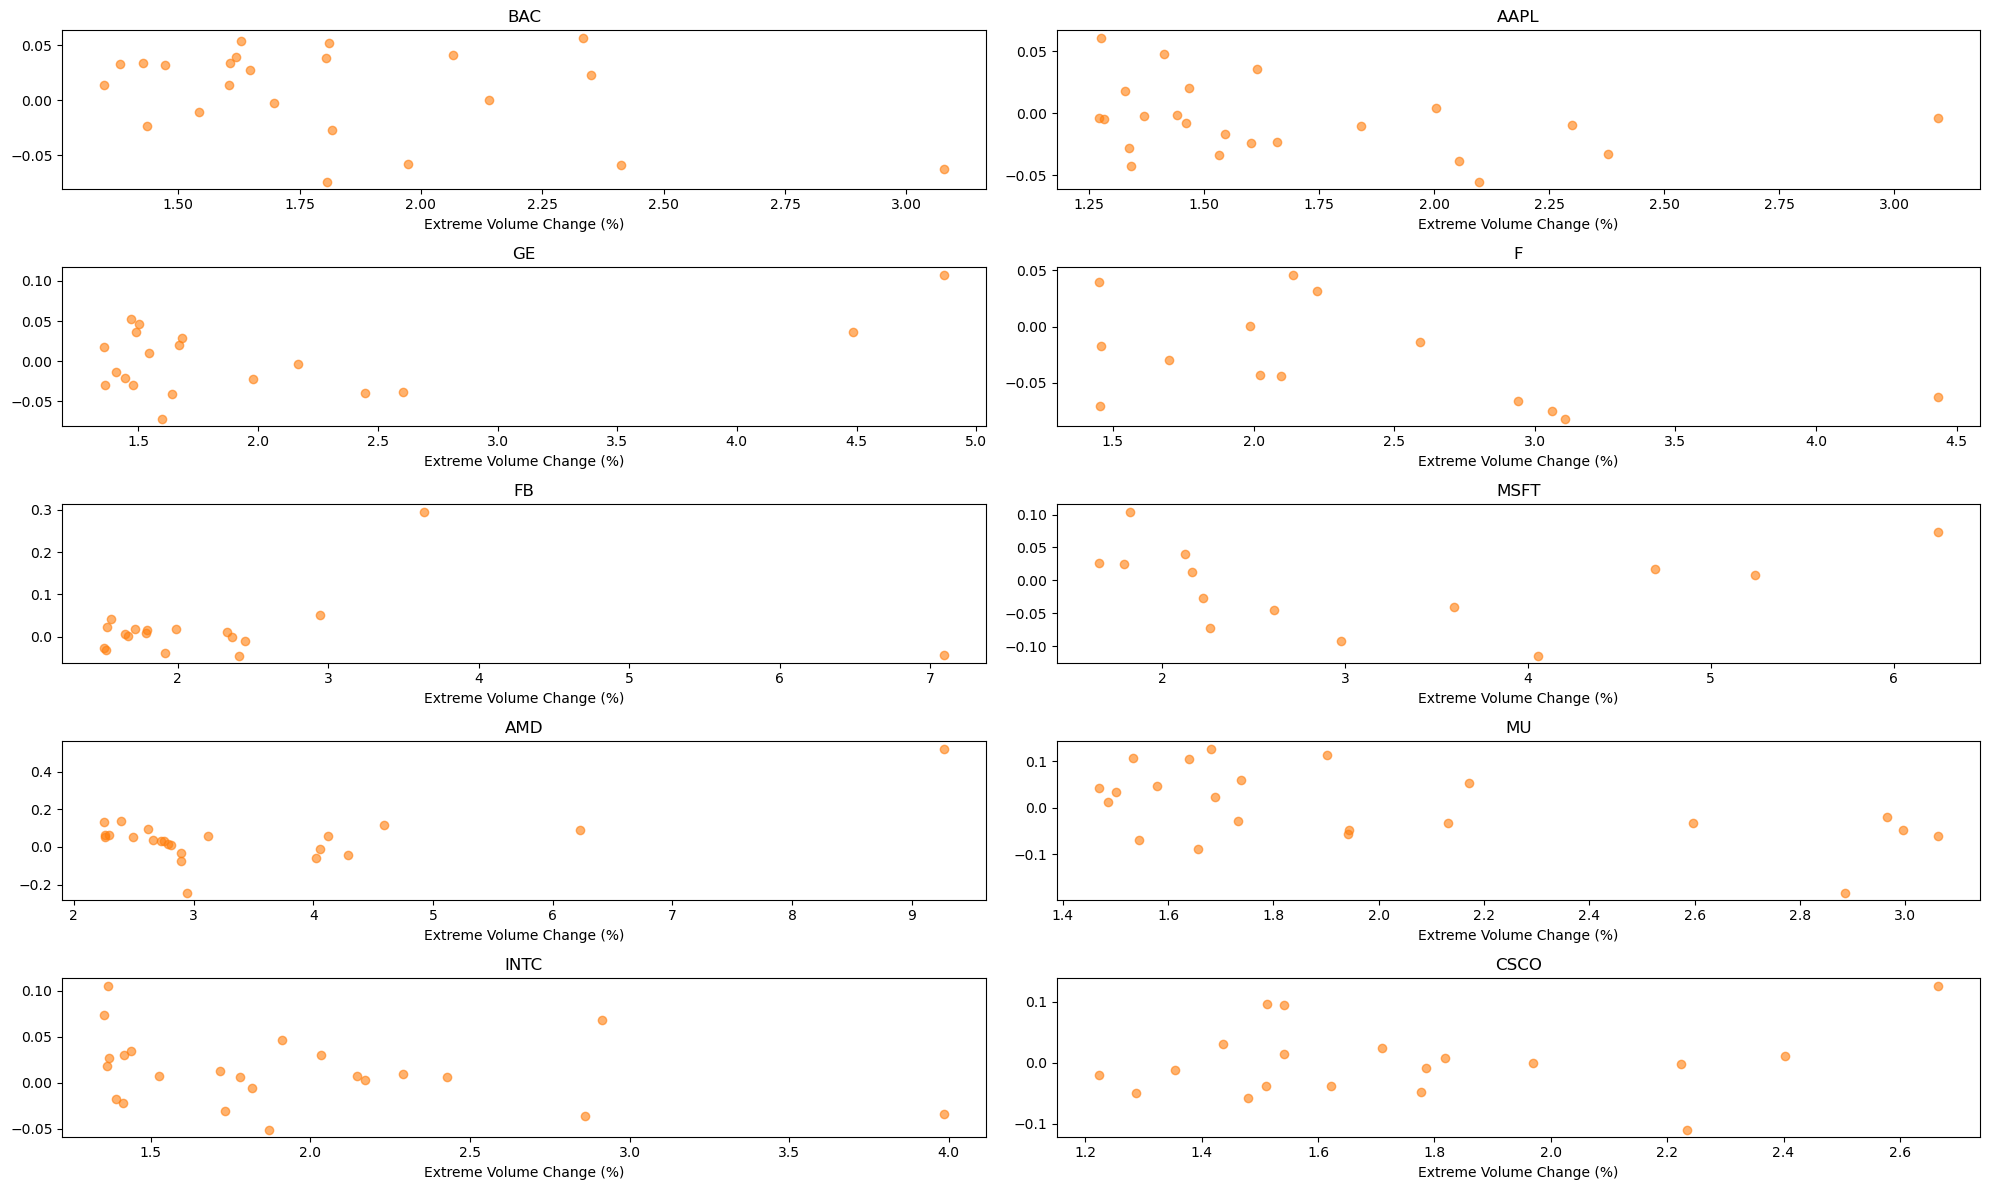

In [218]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 12))  # Adjust for 10 plots
axes = axes.flatten()

for i, comp in enumerate(company):
    ax1 = axes[i]
    d = extreme_volume[extreme_volume['Name'] == comp]  # Filter data by company
    
    ax1.scatter(d['volume_change_pct'], d['price_change_pct'], alpha=0.6, color='tab:orange', label='Close Price')
    ax1.set_title(comp)
    ax1.set_xlabel('Extreme Volume Change (%)')
    ax2.set_ylabel('Price Change (%)')

fig.tight_layout()
plt.show()

Let's substantiate the correlation by calculating pearsons coefficient.

In [220]:
### Calculating the pearsons correlation coefficient for each company
for comp in company:
    d = extreme_volume[extreme_volume['Name'] == comp]
    extreme_correlation = d['price_change_pct'].corr(d['volume_change_pct'])
    print(f"{comp}: {correlation}")

BAC: -0.010366982834805546
AAPL: -0.010366982834805546
GE: -0.010366982834805546
F: -0.010366982834805546
FB: -0.010366982834805546
MSFT: -0.010366982834805546
AMD: -0.010366982834805546
MU: -0.010366982834805546
INTC: -0.010366982834805546
CSCO: -0.010366982834805546


Observations:


1. Across most companies, the scatter points are dispersed with no clear trend, suggesting weak or no correlation between extreme volume changes and price changes.

2. For some companies (e.g., FB, AMD), there appear to be outliers where extreme volume spikes coincide with larger-than-usual price changes, but this pattern is not consistent.

3. Companies like BAC, AAPL, and INTC show tightly clustered points around zero on both axes.

4. For AMD and FB, there are points where large volume changes (> 4-5%) resulted in significant price swings (> 10-20%).

**Price changes are not driven purely by extreme volume changes. Other factors like market news, earnings reports, or broader economic conditions may play a more significant role**

## Risk Analysis

In [232]:
### Calculating the standard deviation and shrape ratio of price pct change for each company
risk_free_ratio = 0.016 ## daily ratio
for comp in company:
    d = data[data['Name'] == comp]
    std = round(d['price_change_pct'].std(),3)
    mean = round(d['price_change_pct'].mean(),3)
    sharpe_ratio = round((mean - risk_free_ratio)/std,3)
    print(f"{comp}:\t {sharpe_ratio} \t {std}")

BAC:	 -0.938 	 0.016
AAPL:	 -1.0 	 0.015
GE:	 -0.455 	 0.033
F:	 -0.567 	 0.03
FB:	 -0.682 	 0.022
MSFT:	 -0.833 	 0.018
AMD:	 -0.319 	 0.047
MU:	 -0.395 	 0.038
INTC:	 -0.833 	 0.018
CSCO:	 -1.0 	 0.016
